In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


# ***merging the train and test stes***

In [2]:
import pandas as pd

# Read the training and testing data
x_train = pd.read_csv('Classifier_X_train.csv')
x_test = pd.read_csv('Classifier_X_test.csv')

# Merge the data
merged_data = pd.concat([x_train, x_test], ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)


In [3]:
merged_data.head(5)

,Al,Ca,Cu,Zr,Ni,Nb,Ag,Mg,Gd,Au,...,S,Sb,Se,Sr,Te,Tl,V,W,Y,Tc
0,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.2,0.2,0.0,0.0
1,0.0,0,0.00,0.20,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,0.0,0,0.00,0.25,0.00,0.25,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,0.0,0,0.25,0.00,0.25,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [4]:
merged_data.shape

(1887, 79)

In [5]:

# Read the training and testing data
y_train = pd.read_csv('Classifier_y_train.csv')
y_test = pd.read_csv('Classifier_y_test.csv')

# Merge the data
merged_y = pd.concat([y_train, y_test], ignore_index=True)

# Save the merged data to a new CSV file
merged_y.to_csv('merged_y.csv', index=False)

merged_y.head(5)

,0
0,1
1,1
2,0
3,0
4,1


In [6]:
merged_y.shape

(1887, 1)

## **merging x , y **

In [7]:
merged_k = pd.concat([merged_data, merged_y], axis = 1 , ignore_index=False)

# Save the merged data to a new CSV file
merged_k.to_csv('merged_all.csv', index=False)
merged_k.head(5)

,Al,Ca,Cu,Zr,Ni,Nb,Ag,Mg,Gd,Au,...,Sb,Se,Sr,Te,Tl,V,W,Y,Tc,0
0,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.2,0.2,0.0,0.0,1
1,0.0,0,0.00,0.20,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
2,0.0,0,0.00,0.25,0.00,0.25,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
3,0.0,0,0.25,0.00,0.25,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,0.0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1


# **Handling missing data **

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
merged_data_imputed = imputer.fit_transform(merged_data)

# **normalizing**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_data_scaled = scaler.fit_transform(merged_data)
merged_data_scaled_imputed = scaler.fit_transform(merged_data_imputed)

# Now, merged_data_scaled contains your data with features normalized and scaled


dimesnsion reduction with pca

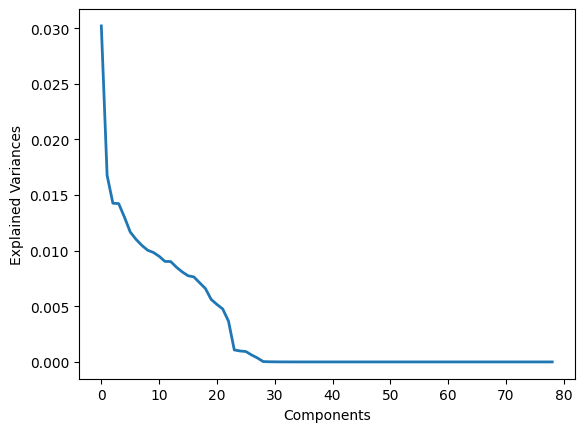

In [10]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  # Importing plt for show() function

pca2 = PCA().fit(merged_data)
plot(pca2.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Adjust the number of components as needed

# Step 2: Fit and transform your data
merged_data_reduced = pca.fit_transform(merged_data)

visuallization of 2 pcs

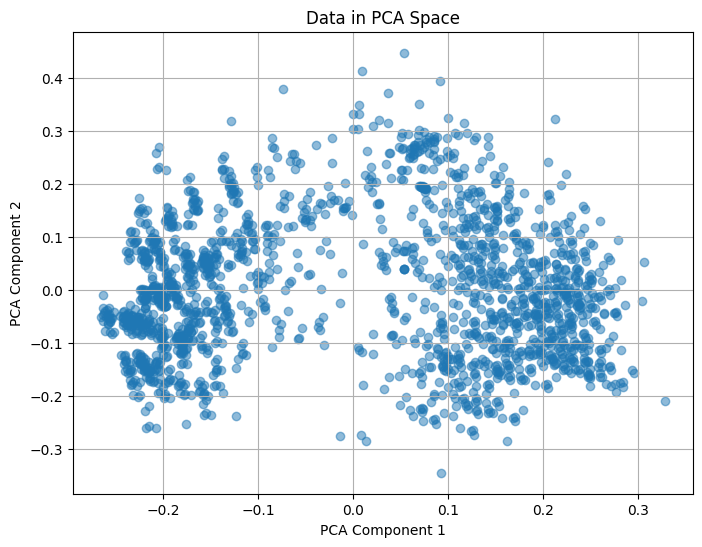

In [13]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data_reduced[:, 0], merged_data_reduced[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

# **3 pcs and 3d representation: **

IndexError: index 2 is out of bounds for axis 1 with size 2

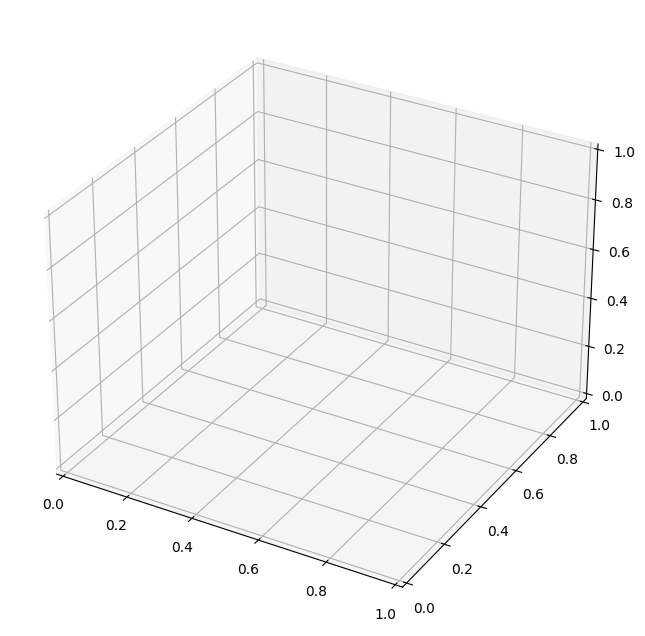

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality
from sklearn.decomposition import PCA

# Assuming you already have performed PCA and stored the results in merged_data_reduced with 3 components

# Plot the data in 3D PCA space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting PCA components
x = merged_data_reduced[:, 0]
y = merged_data_reduced[:, 1]
z = merged_data_reduced[:, 2]

# Scatter plot in 3D
ax.scatter(x, y, z, alpha=0.5)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Data in 3D PCA Space')
plt.show()


# **cross validation: **

In [ ]:
yc = pd.read_csv("merged_y.csv" )
yc.shape

(1887, 1)

In [ ]:
merged_data.shape

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Assuming merged_data and yc are your actual datasets
# Assuming yc is already a pandas Series or DataFrame, no need to read from CSV

X = merged_data.to_numpy()  # Convert to NumPy array
y = yc.to_numpy()  # Convert to NumPy array

# Define the number of folds
k = 5  # You can choose any number less than the dataset's length

# Initialize k-Fold cross-validation
kf = KFold(n_splits=k)

# Initialize list to store R2 scores for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model (You can train your model here)
    # For simplicity, let's just use mean of training data as prediction
    y_pred = np.mean(y_train)

    # Evaluate the model on the testing set (You can evaluate your model here)
    r2 = r2_score(y_test, np.full_like(y_test, y_pred))  # Calculate R2 score
    r2_scores.append(r2)  # Store R2 score

    # Print results for this fold
    print("R2 Score for Fold {}: {:.4f}".format(len(r2_scores), r2))

# Calculate mean R2 score across all folds
mean_r2_score = np.mean(r2_scores)
print("\nMean R2 Score: {:.4f}".format(mean_r2_score))


R2 Score for Fold 1: -0.8000
R2 Score for Fold 2: -0.7339
R2 Score for Fold 3: -0.8125
R2 Score for Fold 4: -0.8571
R2 Score for Fold 5: -0.6982

Mean R2 Score: -0.7804


## **model training**

# train set **performance**

# **performance of test set**

# **plsda**

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [18]:
X_train = pd.read_csv('Classifier_X_train.csv')
X_test = pd.read_csv('Classifier_X_test.csv')
y_test =  pd.read_csv('Classifier_y_test.csv')
y_train=  pd.read_csv('Classifier_y_train.csv')

In [24]:
from sklearn.cross_decomposition import PLSRegression
plsr = PLSRegression(n_components=2, scale=False) # (1)
plsr.fit_transform(X_train, y_train)

(array([[-0.05359053,  0.12381914],
        [-0.06965268,  0.11906554],
        [ 0.02255069,  0.18354296],
        ...,
        [-0.06164102, -0.11699962],
        [ 0.03290893,  0.07958407],
        [-0.175449  ,  0.06347429]]),
 array([[-0.26783569, -0.094142  ],
        [-0.26783569, -0.094142  ],
        [ 0.21580742,  0.0758545 ],
        ...,
        [-0.26783569, -0.094142  ],
        [ 0.21580742,  0.0758545 ],
        [-0.26783569, -0.094142  ]]))

In [25]:
X_scores = plsr.transform(X_train)
train_score_df = pd.DataFrame(data=X_scores, columns = ['PLS1' , 'PLS2'])
train_score_df


,PLS1,PLS2
0,-0.053591,0.123819
1,-0.069653,0.119066
2,0.022551,0.183543
3,0.131189,-0.170231
4,-0.243229,-0.001324
...,...,...
1315,-0.004736,-0.021912
1316,-0.116608,-0.116616
1317,-0.061641,-0.117000
1318,0.032909,0.079584


<ipython-input-26-45fae2fbcf3a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PLS1', y='PLS2',  data=train_score_df, palette='Set1', s=100, label='Train')


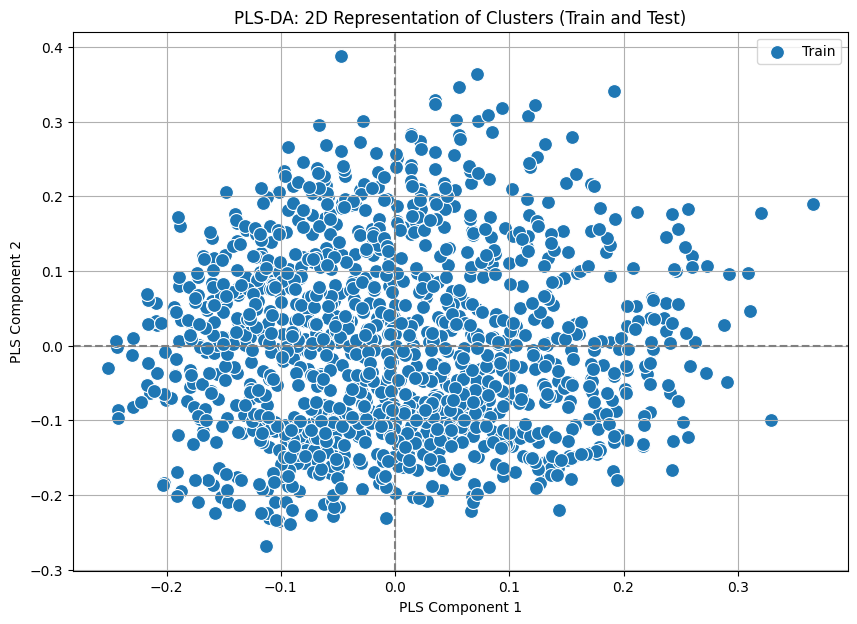

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PLS1', y='PLS2',  data=train_score_df, palette='Set1', s=100, label='Train')
plt.title('PLS-DA: 2D Representation of Clusters (Train and Test)')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# **with** standard scaler

In [28]:

x_sc=StandardScaler().fit_transform(merged_data)
x_sc_train, x_sc_test, y_sc_train, y_sc_test = train_test_split(x_sc, merged_y, test_size=0.2, random_state=seed)
pls2 = PLSRegression(n_components=2, scale=False)
pls2.fit(x_sc_train, y_sc_train)

PLSRegression(scale=False)

In [29]:

x_loadings = pls2.x_loadings_
y_loadings = pls2.y_loadings_

<Axes: xlabel='0', ylabel='1'>

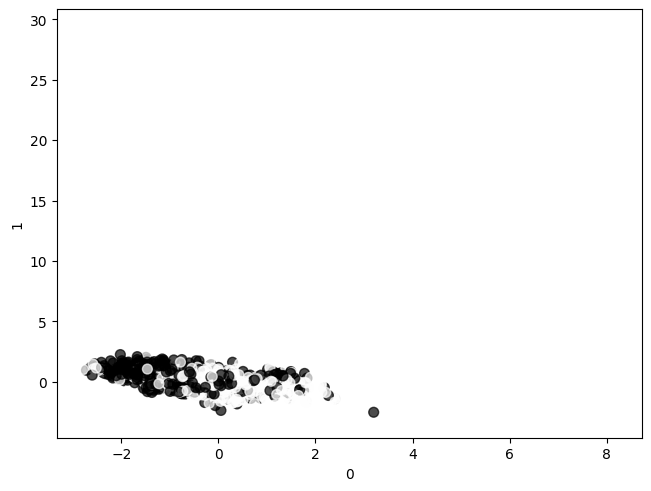

In [36]:
fig, ax = plt.subplots(constrained_layout=True)

scores = pd.DataFrame(pls2.x_scores_)
scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7,
                 c=y_sc_train.values[:,0], ax = ax)


In [48]:



newax = fig.add_axes(ax.get_position(), frameon=False)
feature_n=x_loadings.shape[0]
print(x_loadings.shape)
for feature_i in range(feature_n):
    comp_1_idx=0
    comp_2_idx=1
    newax.arrow(0, 0, x_loadings[feature_i,comp_1_idx], x_loadings[feature_i,comp_2_idx],color = 'r',alpha = 0.5)
newax.get_xaxis().set_visible(False)
newax.get_yaxis().set_visible(False)

plt.show()

(79, 2)


In [33]:
yc = pd.read_csv('merged_y.csv')

In [37]:
import numpy as np

seeds = [0, 1, 2]
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=seed)
    plsda_predictions_prob = pls2.predict(X_test)
    y_pred_binary = np.where(plsda_predictions_prob >= 0.5, 1, 0)
    plsda_accuracy = accuracy_score(y_test, y_pred_binary)

    print(f"=============Seed {seed}: PLS-DA Accuracy: {plsda_accuracy:.4f}==============")



=============Seed 0: PLS-DA Accuracy: 0.5485==============
=============Seed 1: PLS-DA Accuracy: 0.5732==============
=============Seed 2: PLS-DA Accuracy: 0.5802==============


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


In [54]:

X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=2)
plsda_predictions_prob = pls2.predict(X_test)
y_pred_binary = np.where(plsda_predictions_prob >= 0.5, 1, 0)
print(accuracy_score(y_test, y_pred_binary))
print(f"cross val of x_test :{cross_val_score(pls2 ,merged_data, yc, cv=5)}")
print("\nInternal Five-Fold Cross-Validation Scores for PLS-DA:")
#print("Mean Accuracy:", plsda_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


0.5802469135802469
cross val of x_test :[0.19256508 0.12097902 0.18839066 0.17921505 0.08846234]

Internal Five-Fold Cross-Validation Scores for PLS-DA:


In [55]:
plsda_predictions_prob_train = pls2.predict(X_train)
y_pred_binary_train = np.where(plsda_predictions_prob_train >= 0.5, 1, 0)
y_pred_binary_train

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [56]:
plsda_predictions_prob_train

array([[0.41366785],
       [0.41549197],
       [0.43952943],
       ...,
       [0.39989947],
       [0.45118772],
       [0.45239123]])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Set Metrics:
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5


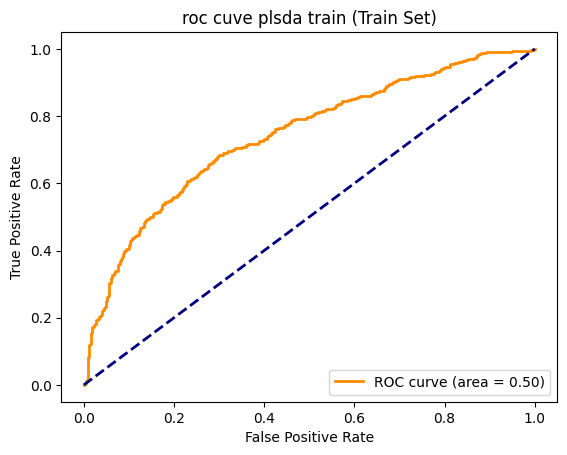

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plsda_predictions_prob_train = pls2.predict(X_train)
y_pred_binary_train = np.where(plsda_predictions_prob_train >= 0.5, 1, 0)
y_pred_binary_train
# Calculate Precision, Recall, F1 Score, and ROC-AUC Score for train set
precision_train = precision_score(y_train, y_pred_binary_train)
recall_train = recall_score(y_train, y_pred_binary_train)
f1_train = f1_score(y_train, y_pred_binary_train)
roc_auc_train = roc_auc_score(y_train, y_pred_binary_train)

print("Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# Plot ROC Curve for train set
fpr_train, tpr_train, _ = roc_curve(y_train, plsda_predictions_prob_train)
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc cuve plsda train (Train Set)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Set Metrics:
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5


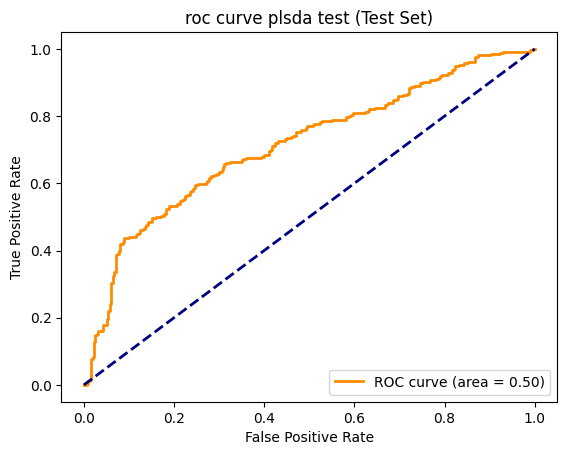

In [47]:
precision_test = precision_score(y_test, y_pred_binary)
recall_test = recall_score(y_test, y_pred_binary)
f1_test = f1_score(y_test, y_pred_binary)
roc_auc_test = roc_auc_score(y_test, y_pred_binary)

print("Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# Plot ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, plsda_predictions_prob)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc curve plsda test (Test Set)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

# Define the range of components to test
components_range = range(1, 10)  # Adjust the range as needed

# Initialize lists to store RMSD values
rmsd_values = []

# Iterate over different numbers of components
for n_components in components_range:
    # Create PLS regression model with current number of components
    pls = PLSRegression(n_components=n_components)

    # Compute cross-validated predictions
    y_pred = cross_val_predict(pls, merged_data, yc, cv=5)

    # Compute the mean squared error (MSE) for the cross-validated predictions
    mse = mean_squared_error(yc, y_pred)

    # Compute the root mean squared deviation (RMSD) from the MSE
    rmsd = np.sqrt(mse)

    # Append the RMSD value to the list
    rmsd_values.append(rmsd)

# Plot RMSD values as a function of the number of components
plt.plot(components_range, rmsd_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('RMSD')
plt.title('PLS Regression: Number of Components vs. RMSD')
plt.grid(True)
plt.show()



## **plsda_cross validation **

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from sklearn.cross_decomposition import PLSRegression
# Define pipeline with DecisionTreeClassifier
 # Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
pipeline = PLSRegression(n_components=7)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict(X_train)
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)

accuracy_scores.append(accuracy_fold)



print("Accuracy:", accuracy_fold)

print("Decision Tree Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)

accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)



print("\nDecision Tree Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [16]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.cross_decomposition import PLSRegression


# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier= PLSRegression(n_components=7)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict(X_test)
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


========Fold 1 Metrics========
Accuracy: 0.7063492063492064
Precision: 0.6766467065868264
Recall: 0.6647058823529411
F1 Score: 0.6706231454005934
ROC-AUC Score: 0.7658088235294118


========Fold 2 Metrics========
Accuracy: 0.6984126984126984
Precision: 0.5952380952380952
Recall: 0.684931506849315
F1 Score: 0.6369426751592356
ROC-AUC Score: 0.7582368918280585


========Fold 3 Metrics========
Accuracy: 0.6843501326259946
Precision: 0.7092198581560284
Recall: 0.5617977528089888
F1 Score: 0.6269592476489029
ROC-AUC Score: 0.7536276890068319


========Fold 4 Metrics========
Accuracy: 0.7082228116710876
Precision: 0.696551724137931
Recall: 0.6047904191616766
F1 Score: 0.6474358974358974
ROC-AUC Score: 0.7467065868263472


========Fold 5 Metrics========
Accuracy: 0.6790450928381963
Precision: 0.6428571428571429
Recall: 0.6
F1 Score: 0.6206896551724138
ROC-AUC Score: 0.7424242424242424


Mean Accuracy: 0.6952759883794366
Mean Precision: 0.6641027053952048
Mean Recall: 0.6232451122345843
Mean F

# **comparison of other models used in the article**

# **descison tree classification **

Accuracy: 1.0
Decision Tree Train Set Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


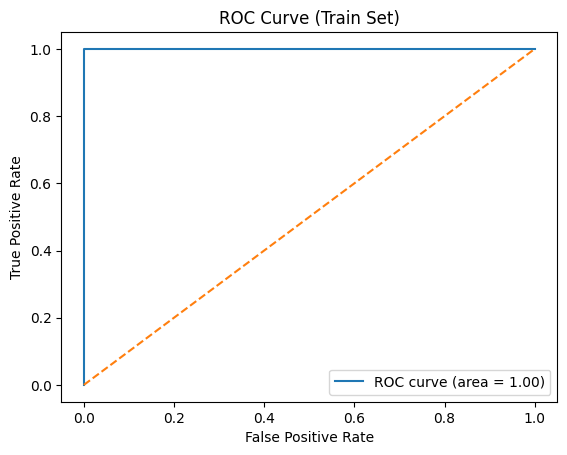

Accuracy: 0.7486772486772487

Decision Tree Test Set Metrics:
Precision: 0.7134502923976608
Recall: 0.7261904761904762
F1 Score: 0.71976401179941
ROC-AUC Score: 0.7464285714285714


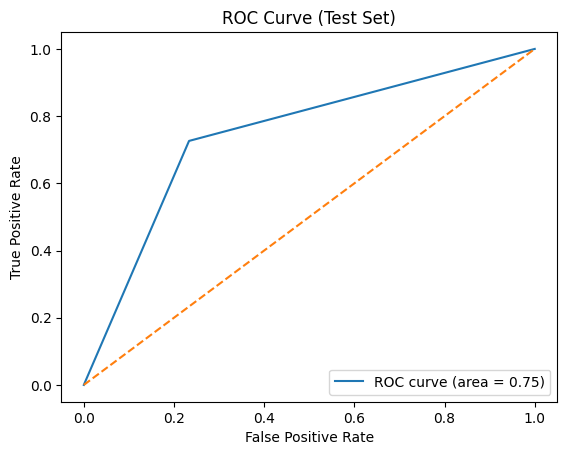

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define pipeline with DecisionTreeClassifier
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)

accuracy_scores.append(accuracy_fold)



print("Accuracy:", accuracy_fold)

print("Decision Tree Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)

accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)



print("\nDecision Tree Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **descison tree classification cv **

In [8]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data.iloc[train_index], merged_data.iloc[test_index]
    y_train, y_test = yc.iloc[train_index], yc.iloc[test_index]

    # Train the model
    decision_tree_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = decision_tree_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


======== Fold 1 Metrics ========
Accuracy: 0.7619047619047619
Precision: 0.7439024390243902
Recall: 0.7176470588235294
F1 Score: 0.7305389221556886
ROC-AUC Score: 0.7578619909502263


======== Fold 2 Metrics ========
Accuracy: 0.7116402116402116
Precision: 0.6121212121212121
Recall: 0.6917808219178082
F1 Score: 0.6495176848874598
ROC-AUC Score: 0.7079593764761454


======== Fold 3 Metrics ========
Accuracy: 0.726790450928382
Precision: 0.7218934911242604
Recall: 0.6853932584269663
F1 Score: 0.7031700288184438
ROC-AUC Score: 0.7246061769521767


======== Fold 4 Metrics ========
Accuracy: 0.753315649867374
Precision: 0.7371794871794872
Recall: 0.688622754491018
F1 Score: 0.7120743034055727
ROC-AUC Score: 0.7466923296264614


======== Fold 5 Metrics ========
Accuracy: 0.76657824933687
Precision: 0.7175141242937854
Recall: 0.7696969696969697
F1 Score: 0.7426900584795321
ROC-AUC Score: 0.766923956546598


Mean Accuracy: 0.7440458647355198
Mean Precision: 0.7065221507486271
Mean Recall: 0.71

# **extra treee classification **

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy: 1.0
Extra Trees Train Set Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


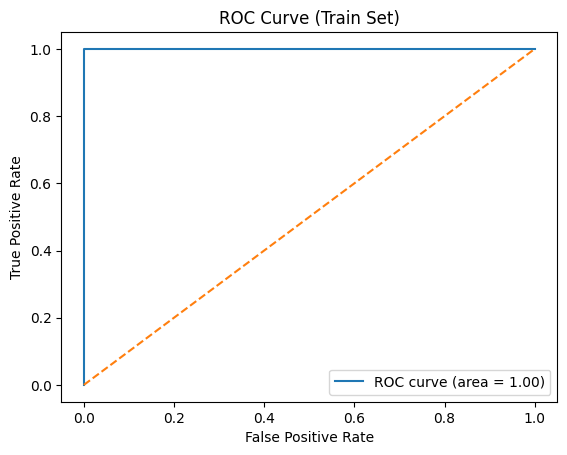

Accuracy: 0.791005291005291

Extra Trees Test Set Metrics:
Precision: 0.7664670658682635
Recall: 0.7619047619047619
F1 Score: 0.764179104477612
ROC-AUC Score: 0.8633503401360544


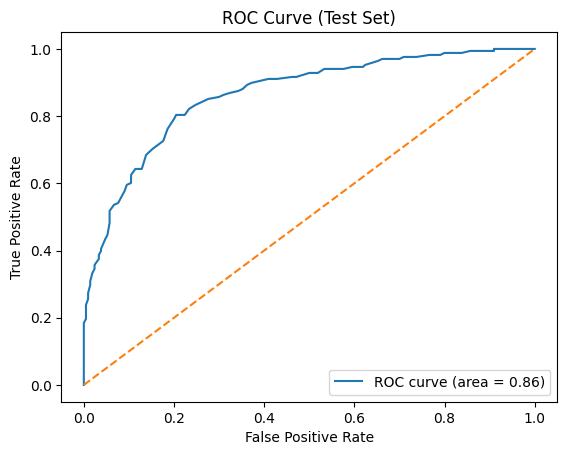

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define pipeline with ExtraTreesClassifier
pipeline = Pipeline([
    ('classifier', ExtraTreesClassifier(random_state=0))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)

accuracy_scores.append(accuracy_fold)



print("Accuracy:", accuracy_fold)

print("Extra Trees Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)

roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)

accuracy_fold = accuracy_score(y_test, predicted_labels_test)

accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)



print("\nExtra Trees Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **extra tree classificiation cv**

In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data.iloc[train_index], merged_data.iloc[test_index]
    y_train, y_test = yc.iloc[train_index], yc.iloc[test_index]

    # Train the model
    extra_trees_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = extra_trees_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


<ipython-input-6-673cbe94b330>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier.fit(X_train, y_train)


======== Fold 1 Metrics ========
Accuracy: 0.798941798941799
Precision: 0.7901234567901234
Recall: 0.7529411764705882
F1 Score: 0.7710843373493975
ROC-AUC Score: 0.8791855203619909




<ipython-input-6-673cbe94b330>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier.fit(X_train, y_train)


======== Fold 2 Metrics ========
Accuracy: 0.7857142857142857
Precision: 0.7152317880794702
Recall: 0.7397260273972602
F1 Score: 0.7272727272727272
ROC-AUC Score: 0.8613899385923476




<ipython-input-6-673cbe94b330>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier.fit(X_train, y_train)


======== Fold 3 Metrics ========
Accuracy: 0.7453580901856764
Precision: 0.7662337662337663
Recall: 0.6629213483146067
F1 Score: 0.7108433734939759
ROC-AUC Score: 0.8424707808706453




<ipython-input-6-673cbe94b330>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier.fit(X_train, y_train)


======== Fold 4 Metrics ========
Accuracy: 0.8143236074270557
Precision: 0.8344827586206897
Recall: 0.7245508982035929
F1 Score: 0.7756410256410257
ROC-AUC Score: 0.8872683205018536




<ipython-input-6-673cbe94b330>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier.fit(X_train, y_train)


======== Fold 5 Metrics ========
Accuracy: 0.7931034482758621
Precision: 0.7806451612903226
Recall: 0.7333333333333333
F1 Score: 0.75625
ROC-AUC Score: 0.8766723842195541


Mean Accuracy: 0.7874882461089358
Mean Precision: 0.7773433862028745
Mean Recall: 0.7226945567438763
Mean F1 Score: 0.7482182927514253
Mean ROC-AUC Score: 0.8693973889092783


## **gbc hypertunning**

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

merged_data = pd.read_csv('merged_data.csv')
yc = pd.read_csv('merged_y.csv')
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(merged_data, yc, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Flatten y_train and y_val
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

# Create Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid = {

    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth": [3, 5, 8],
    "max_features": ["log2", "sqrt"],
    "criterion": ["friedman_mse", "mae"],
    "subsample": [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [10]
}

# Initialize GridSearchCV
gs = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5 , n_jobs = -1)

# Fit GridSearchCV to training data
gs.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = gs.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters:")
print(gs.best_params_)

# Evaluate the best model on the test set
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
test_score = best_model.score(X_test, y_test)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_probs)
f1 = f1_score(y_test, best_model.predict(X_test))
accuracy = accuracy_score(y_test, best_model.predict(X_test))
precision = precision_score(y_test, best_model.predict(X_test))
recall = recall_score(y_test, best_model.predict(X_test))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print evaluation metrics
print('Test Score:', round(test_score, 4))
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


KeyboardInterrupt: 

# **check gbc hypertuning:**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Accuracy: 0.9847581179589132
Extra Trees Train Set Metrics:
Precision: 0.9832572298325722
Recall: 0.9817629179331308
F1 Score: 0.9825095057034221
ROC-AUC Score: 0.999191010754378


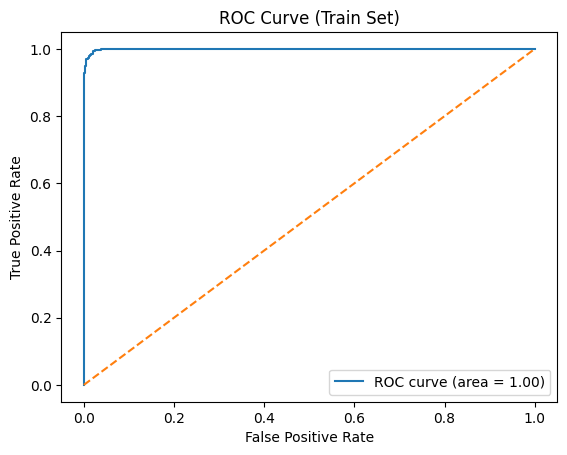

Accuracy: 0.798941798941799

Extra Trees Test Set Metrics:
Precision: 0.7674418604651163
Recall: 0.7857142857142857
F1 Score: 0.7764705882352941
ROC-AUC Score: 0.863718820861678


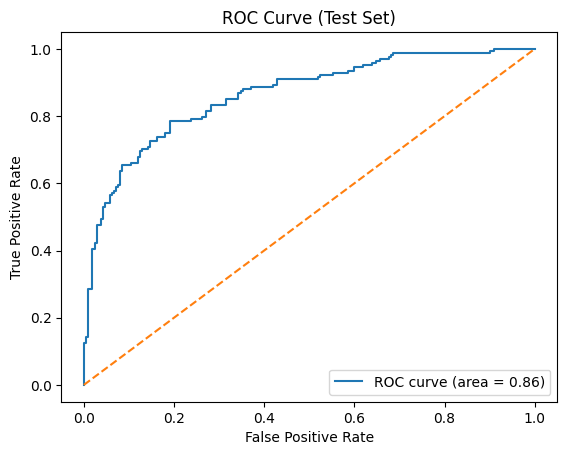

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

merged_data = pd.read_csv('merged_data.csv')
yc = pd.read_csv('merged_y.csv')
# Define pipeline with Extra Trees Classifier
pipeline = GradientBoostingClassifier(loss = 'deviance' , n_estimators= 100 , max_depth = 8 , random_state = 0)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)

print("Extra Trees Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)


print("\nExtra Trees Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


In [11]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()

# Define the classifier
gb_classifier = GradientBoostingClassifier(loss = 'deviance' , n_estimators= 100 , max_depth = 8 , random_state = 0)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    gb_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = gb_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


======== Fold 1 Metrics ========
Accuracy: 0.7804232804232805
Precision: 0.7701863354037267
Recall: 0.7294117647058823
F1 Score: 0.7492447129909365
ROC-AUC Score: 0.8582861990950226




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


======== Fold 2 Metrics ========
Accuracy: 0.7645502645502645
Precision: 0.6838709677419355
Recall: 0.726027397260274
F1 Score: 0.7043189368770764
ROC-AUC Score: 0.8583490788852148




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


======== Fold 3 Metrics ========
Accuracy: 0.7480106100795756
Precision: 0.7577639751552795
Recall: 0.6853932584269663
F1 Score: 0.7197640117994101
ROC-AUC Score: 0.846281971656033




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


======== Fold 4 Metrics ========
Accuracy: 0.8037135278514589
Precision: 0.8206896551724138
Recall: 0.7125748502994012
F1 Score: 0.7628205128205128
ROC-AUC Score: 0.8672654690618763




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


======== Fold 5 Metrics ========
Accuracy: 0.7798408488063661
Precision: 0.7733333333333333
Recall: 0.703030303030303
F1 Score: 0.7365079365079364
ROC-AUC Score: 0.8748999428244711


Mean Accuracy: 0.7753077063421892
Mean Precision: 0.7611688533613378
Mean Recall: 0.7112875147445654
Mean F1 Score: 0.7345312221991744
Mean ROC-AUC Score: 0.8610165323045236


# **k means **

In [ ]:
principal_df_k_only = pd.DataFrame(data=merged_data)
from sklearn.cluster import KMeans

kmeans_only= KMeans(n_clusters=2, random_state=42)
kmeans_only.fit_predict(principal_df_k_only)

principal_df_k_only['Cluster'] = kmeans_only.labels_

principal_components=principal_df_k_only.drop('Cluster',axis =1)

labels=kmeans_only.labels_
from sklearn.metrics import silhouette_score\

print(f"=========={silhouette_score(principal_components , labels)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


==========0.11509586880281636


# **pca with k means **

In [ ]:
from sklearn.decomposition import PCA
pcak = PCA(n_components= 2)
model_pca_k = pcak.fit_transform(merged_data)
principal_df = pd.DataFrame(data=model_pca_k, columns=['PC1', 'PC2'])
principal_df.head(10)

,PC1,PC2
0,-0.222189,-0.016149
1,-0.185498,-0.030133
2,-0.209308,0.075882
3,0.242795,0.118797
4,-0.197743,-0.177007
5,-0.143333,-0.073819
6,0.244347,0.063275
7,-0.233342,-0.146008
8,0.225357,0.066111
9,-0.235253,-0.150561


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(principal_df)

principal_df['Cluster'] = kmeans.labels_

principal_components=principal_df.drop('Cluster',axis =1)

labels=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


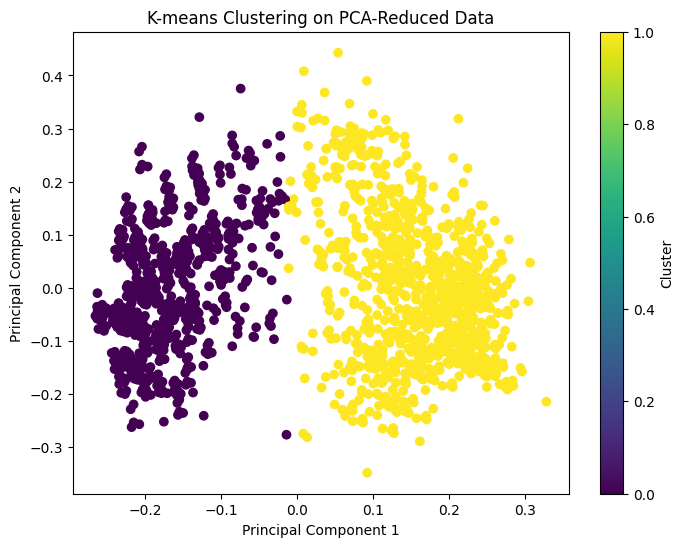

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(principal_components , labels)

0.5244702127481635

# **logistic regression **

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7044400265076209
Logistic Regression Train Set Metrics:
Precision: 0.6872791519434629
Recall: 0.5911854103343465
F1 Score: 0.6356209150326797
ROC-AUC Score: 0.7593283781997935


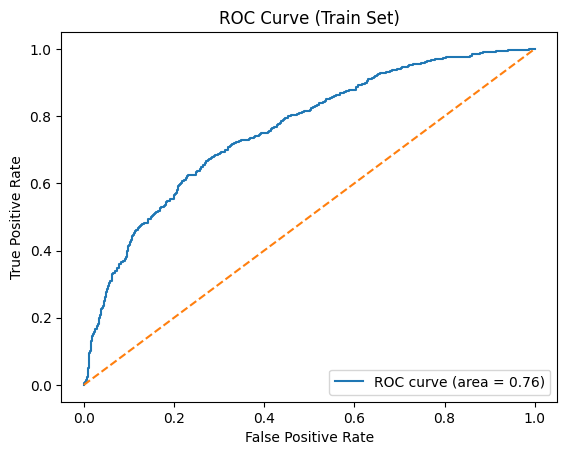

Accuracy: 0.6957671957671958

Logistic Regression Test Set Metrics:
Precision: 0.6778523489932886
Recall: 0.6011904761904762
F1 Score: 0.6372239747634069
ROC-AUC Score: 0.722250566893424


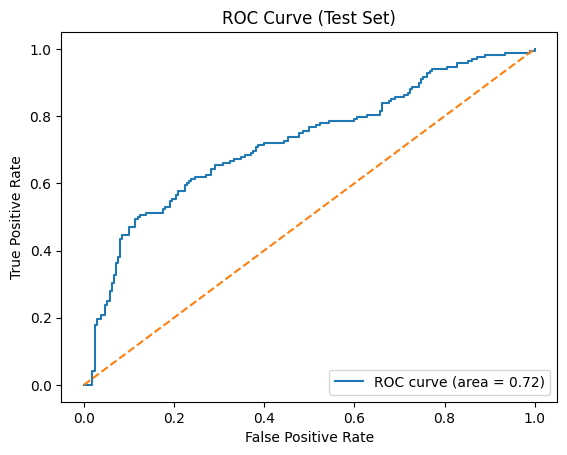

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define pipeline with Logistic Regression
pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=0))
])
yc = pd.read_csv('merged_y.csv')
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)

print("Logistic Regression Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)


print("\nLogistic Regression Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **logistic regression cv**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data.iloc[train_index], merged_data.iloc[test_index]
    y_train, y_test = yc.iloc[train_index], yc.iloc[test_index]

    # Train the model
    logistic_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = logistic_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 1 Metrics ========
Accuracy: 0.701058201058201
Precision: 0.6993006993006993
Recall: 0.5882352941176471
F1 Score: 0.6389776357827477
ROC-AUC Score: 0.760237556561086


======== Fold 2 Metrics ========
Accuracy: 0.7063492063492064
Precision: 0.6114649681528662
Recall: 0.6575342465753424
F1 Score: 0.6336633663366338
ROC-AUC Score: 0.7448334907888522


======== Fold 3 Metrics ========
Accuracy: 0.6843501326259946
Precision: 0.7398373983739838
Recall: 0.5112359550561798
F1 Score: 0.6046511627906976
ROC-AUC Score: 0.7445937552933205


======== Fold 4 Metrics ========
Accuracy: 0.6923076923076923
Precision: 0.6888888888888889
Recall: 0.5568862275449101
F1 Score: 0.6158940397350993
ROC-AUC Score: 0.7325064157399488


======== Fold 5 Metrics ========
Accuracy: 0.6843501326259946
Precision: 0.6642857142857143
Recall: 0.5636363636363636
F1 Score: 0.6098360655737705
ROC-AUC Score: 0.7262149799885649


Mean Accuracy: 0.6936830729934179
Mean Precision: 0.6807555338004305
Mean Recall: 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **sgd**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6772697150430749
SGD Train Set Metrics:
Precision: 0.7598784194528876
Recall: 0.3799392097264438
F1 Score: 0.5065856129685917
ROC-AUC Score: 0.7621232306708716


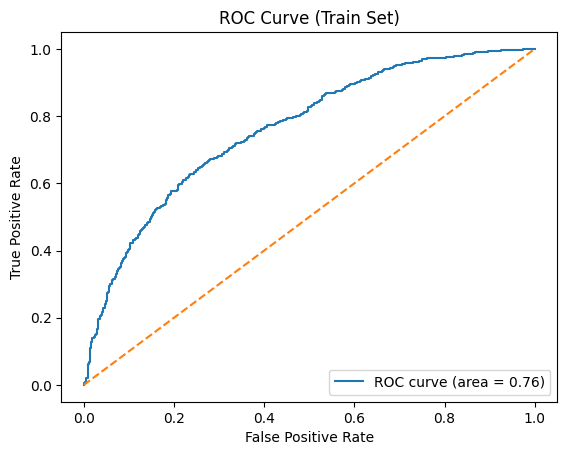

Accuracy: 0.6825396825396826

SGD Test Set Metrics:
Precision: 0.7790697674418605
Recall: 0.39880952380952384
F1 Score: 0.5275590551181103
ROC-AUC Score: 0.7320578231292518


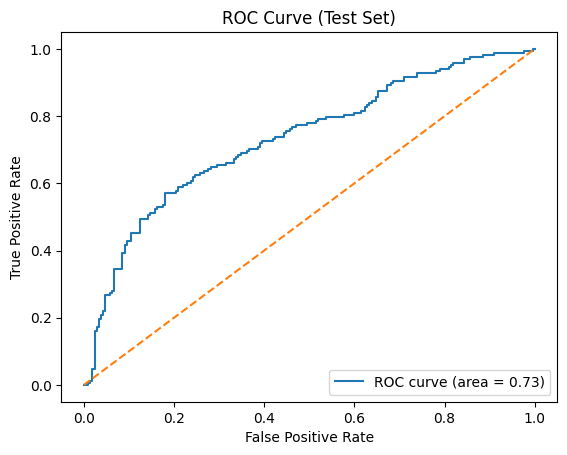

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define pipeline with SGDClassifier
pipeline = Pipeline([
    ('classifier', SGDClassifier(loss='log', random_state=0))  # 'log' loss for logistic regression
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)


print("SGD Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)
print("\nSGD Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# sgd **cv**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the classifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data.iloc[train_index], merged_data.iloc[test_index]
    y_train, y_test = yc.iloc[train_index], yc.iloc[test_index]

    # Train the model
    sgd_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = sgd_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

======== Fold 1 Metrics ========
Accuracy: 0.6851851851851852
Precision: 0.6294416243654822
Recall: 0.7294117647058823
F1 Score: 0.6757493188010899
ROC-AUC Score: 0.7613404977375565


======== Fold 2 Metrics ========
Accuracy: 0.7222222222222222
Precision: 0.6413793103448275
Recall: 0.636986301369863
F1 Score: 0.6391752577319587
ROC-AUC Score: 0.7474315068493151




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

======== Fold 3 Metrics ========
Accuracy: 0.6816976127320955
Precision: 0.7543859649122807
Recall: 0.48314606741573035
F1 Score: 0.589041095890411
ROC-AUC Score: 0.746287617864604


======== Fold 4 Metrics ========
Accuracy: 0.6976127320954907
Precision: 0.7054263565891473
Recall: 0.5449101796407185
F1 Score: 0.6148648648648649
ROC-AUC Score: 0.7371827773025379


======== Fold 5 Metrics ========
Accuracy: 0.6816976127320955
Precision: 0.6229508196721312
Recall: 0.6909090909090909
F1 Score: 0.6551724137931035
ROC-AUC Score: 0.7316752429959976


Mean Accuracy: 0.6936830729934178
Mean Precision: 0.6707168151767737
Mean Recall: 0.6170726808082571
Mean F1 Score: 0.6348005902162857
Mean ROC-AUC Score: 0.7447835285500023


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **svm**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8641484426772698
SVM Train Set Metrics:
Precision: 0.8624
Recall: 0.8191489361702128
F1 Score: 0.8402182385035075
ROC-AUC Score: 0.9412152339996929


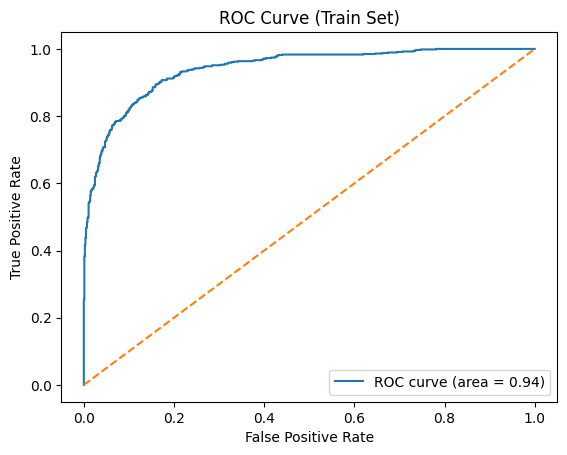

Accuracy: 0.783068783068783

SVM Test Set Metrics:
Precision: 0.7828947368421053
Recall: 0.7083333333333334
F1 Score: 0.74375
ROC-AUC Score: 0.8661564625850341


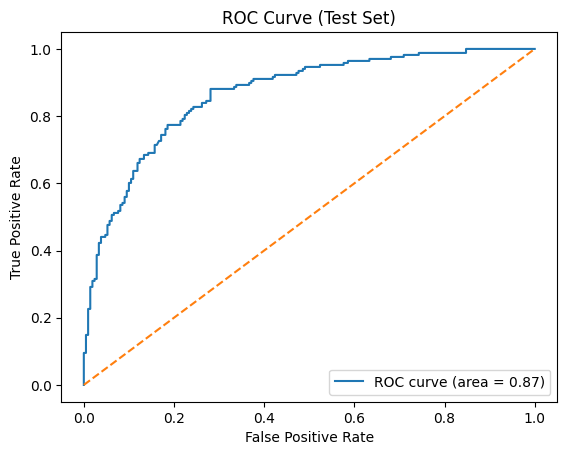

Features are not 2-dimensional. Cannot plot decision boundary.


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define pipeline with Support Vector Machine (SVM)
pipeline = Pipeline([
    ('classifier', SVC(probability=True))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
print("SVM Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)


print("\nSVM Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plotting the SVM decision boundary for class discrimination
def plot_decision_boundary(X, y, model, title):
    # Check if the number of features is greater than 2
    if X.shape[1] > 2:
        print("Cannot plot decision boundary for datasets with more than 2 features.")
        return

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    for label, marker, color in zip(np.unique(y), ('^', 's'), ('blue', 'red')):
        plt.scatter(x=X[y == label][:, 0], y=X[y == label][:, 1], marker=marker, color=color, alpha=0.7, label=f'Class {label}')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right')
    plt.show()

# Plot decision boundary if features are 2-dimensional
if X_train.shape[1] == 2:
    plot_decision_boundary(X_train, y_train, pipeline, 'SVM: Decision Boundary for Class Discrimination')
else:
    print("Features are not 2-dimensional. Cannot plot decision boundary.")



# svm **cv**

In [22]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the classifier
svm_classifier = SVC(probability=True)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data.iloc[train_index], merged_data.iloc[test_index]
    y_train, y_test = yc.iloc[train_index], yc.iloc[test_index]

    # Train the model
    svm_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = svm_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 1 Metrics ========
Accuracy: 0.798941798941799
Precision: 0.79375
Recall: 0.7470588235294118
F1 Score: 0.7696969696969697
ROC-AUC Score: 0.8813489819004524




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 2 Metrics ========
Accuracy: 0.7486772486772487
Precision: 0.6666666666666666
Recall: 0.6986301369863014
F1 Score: 0.6822742474916388
ROC-AUC Score: 0.8354835852621634




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 3 Metrics ========
Accuracy: 0.7718832891246684
Precision: 0.8026315789473685
Recall: 0.6853932584269663
F1 Score: 0.7393939393939394
ROC-AUC Score: 0.8532268081982949




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 4 Metrics ========
Accuracy: 0.7877984084880637
Precision: 0.7959183673469388
Recall: 0.7005988023952096
F1 Score: 0.7452229299363058
ROC-AUC Score: 0.8782720273738238




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 5 Metrics ========
Accuracy: 0.7745358090185677
Precision: 0.7597402597402597
Recall: 0.7090909090909091
F1 Score: 0.7335423197492162
ROC-AUC Score: 0.8598627787307033


Mean Accuracy: 0.7763673108500695
Mean Precision: 0.7637413745402468
Mean Recall: 0.7081543860857596
Mean F1 Score: 0.7340260812536139
Mean ROC-AUC Score: 0.8616388362930876


# **LDA**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7024519549370444
LDA Train Set Metrics:
Precision: 0.6682769726247987
Recall: 0.6306990881458967
F1 Score: 0.6489444878811572
ROC-AUC Score: 0.7695702177663325


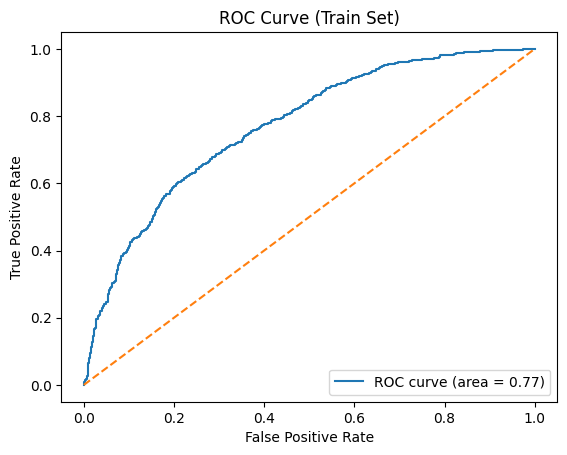

Accuracy: 0.701058201058201

LDA Test Set Metrics:
Precision: 0.6774193548387096
Recall: 0.625
F1 Score: 0.6501547987616099
ROC-AUC Score: 0.7449829931972789


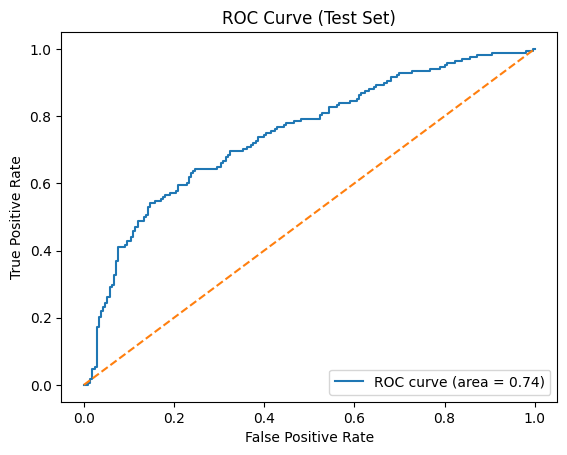

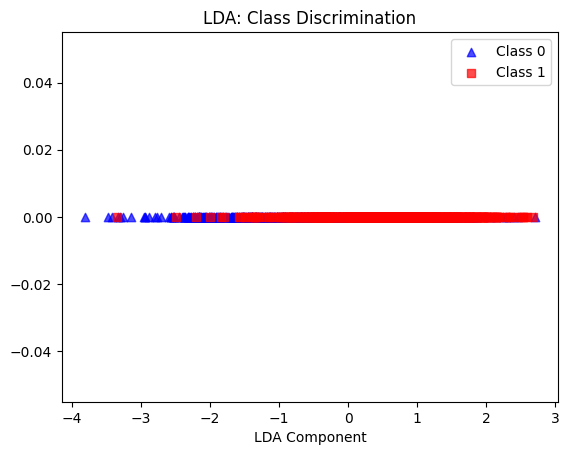

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define pipeline with Linear Discriminant Analysis
pipeline = Pipeline([
    ('classifier', LinearDiscriminantAnalysis())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
print("LDA Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)
print("\nLDA Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Plotting the LDA components for class discrimination
lda = pipeline.named_steps['classifier']
X_lda = lda.transform(X_train)

plt.figure()
for label, marker, color in zip(np.unique(y_train), ('^', 's'), ('blue', 'red')):
    plt.scatter(x=X_lda[y_train == label], y=np.zeros_like(X_lda[y_train == label]), marker=marker, color=color, alpha=0.7, label=f'Class {label}')
plt.xlabel('LDA Component')
plt.title('LDA: Class Discrimination')
plt.legend(loc='upper right')
plt.show()


# **lda cv**

In [21]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()

# Define the classifier
lda_classifier = LinearDiscriminantAnalysis()

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    lda_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = lda_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

======== Fold 1 Metrics ========
Accuracy: 0.7037037037037037
Precision: 0.6726190476190477
Recall: 0.6647058823529411
F1 Score: 0.6686390532544378
ROC-AUC Score: 0.7657522624434389


======== Fold 2 Metrics ========
Accuracy: 0.6984126984126984
Precision: 0.5952380952380952
Recall: 0.684931506849315
F1 Score: 0.6369426751592356
ROC-AUC Score: 0.7582368918280585


======== Fold 3 Metrics ========
Accuracy: 0.6843501326259946
Precision: 0.7092198581560284
Recall: 0.5617977528089888
F1 Score: 0.6269592476489029
ROC-AUC Score: 0.7536559200496866


======== Fold 4 Metrics ========
Accuracy: 0.7082228116710876
Precision: 0.696551724137931
Recall: 0.6047904191616766
F1 Score: 0.6474358974358974
ROC-AUC Score: 0.7467921300256628


======== Fold 5 Metrics ========
Accuracy: 0.6790450928381963
Precision: 0.6428571428571429
Recall: 0.6
F1 Score: 0.6206896551724138
ROC-AUC Score: 0.7423670668953689


Mean Accuracy: 0.6947468878503361
Mean Precision: 0.663297173601649
Mean Recall: 0.62324511223458

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **AdaBoostClassifier**



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7256461232604374
Extra Trees Train Set Metrics:
Precision: 0.6848484848484848
Recall: 0.6869300911854104
F1 Score: 0.6858877086494689
ROC-AUC Score: 0.8168353697955919


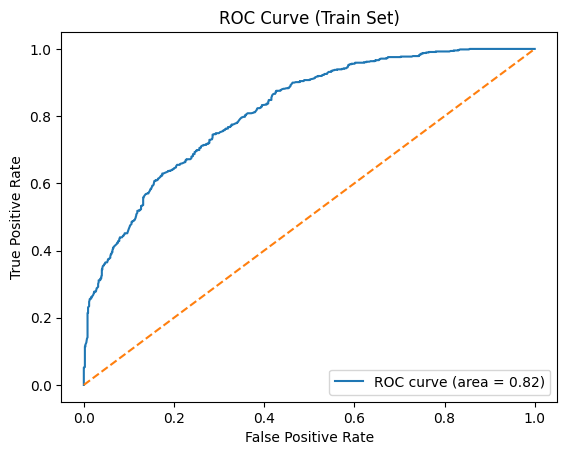

Accuracy: 0.7354497354497355

Extra Trees Test Set Metrics:
Precision: 0.6910112359550562
Recall: 0.7321428571428571
F1 Score: 0.7109826589595376
ROC-AUC Score: 0.8035147392290249


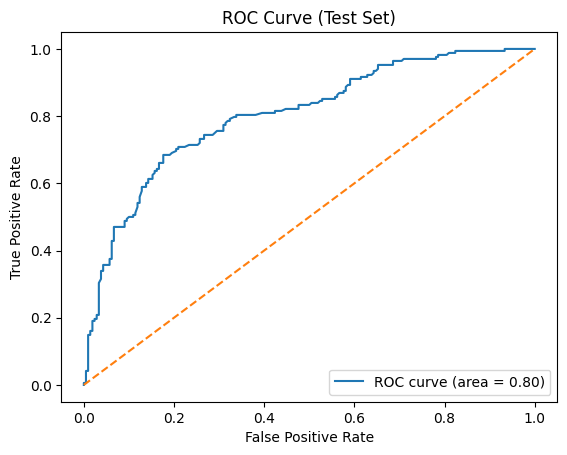

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define pipeline with Extra Trees Classifier
pipeline = Pipeline([
    ('classifier', AdaBoostClassifier())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)

print("Extra Trees Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)
print("\nExtra Trees Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


## **AdaBoostClassifier cv**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()

# Define the classifier
ab_classifier = AdaBoostClassifier()

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    ab_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = ab_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 1 Metrics ========
Accuracy: 0.716931216931217
Precision: 0.6863905325443787
Recall: 0.6823529411764706
F1 Score: 0.6843657817109144
ROC-AUC Score: 0.803789592760181


======== Fold 2 Metrics ========
Accuracy: 0.716931216931217
Precision: 0.6167664670658682
Recall: 0.7054794520547946
F1 Score: 0.65814696485623
ROC-AUC Score: 0.791110651865848




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 3 Metrics ========
Accuracy: 0.7161803713527851
Precision: 0.7414965986394558
Recall: 0.6123595505617978
F1 Score: 0.6707692307692309
ROC-AUC Score: 0.7704110439839648


======== Fold 4 Metrics ========
Accuracy: 0.7161803713527851
Precision: 0.6948051948051948
Recall: 0.6407185628742516
F1 Score: 0.6666666666666667
ROC-AUC Score: 0.7880667236954664


======== Fold 5 Metrics ========
Accuracy: 0.7161803713527851
Precision: 0.676829268292683
Recall: 0.6727272727272727
F1 Score: 0.6747720364741642
ROC-AUC Score: 0.7909233847913093


Mean Accuracy: 0.7164807095841578
Mean Precision: 0.6832576122695161
Mean Recall: 0.6627275558789176
Mean F1 Score: 0.6709441360954413
Mean ROC-AUC Score: 0.7888602794193539


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Gradient Boosting Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8376408217362492
Extra Trees Train Set Metrics:
Precision: 0.8304
Recall: 0.7887537993920972
F1 Score: 0.8090413094310211
ROC-AUC Score: 0.9116067633643951


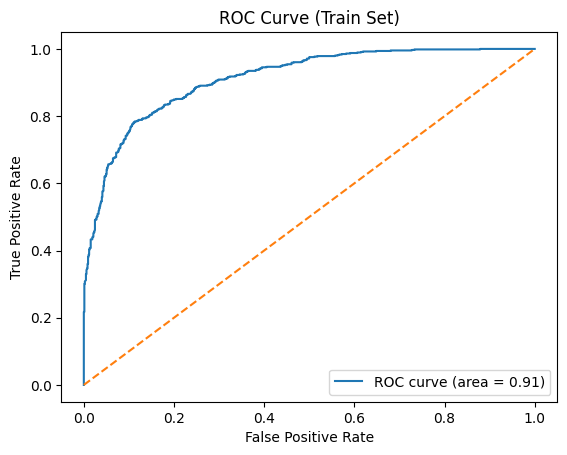

Accuracy: 0.7619047619047619

Extra Trees Test Set Metrics:
Precision: 0.7267441860465116
Recall: 0.7440476190476191
F1 Score: 0.7352941176470588
ROC-AUC Score: 0.834297052154195


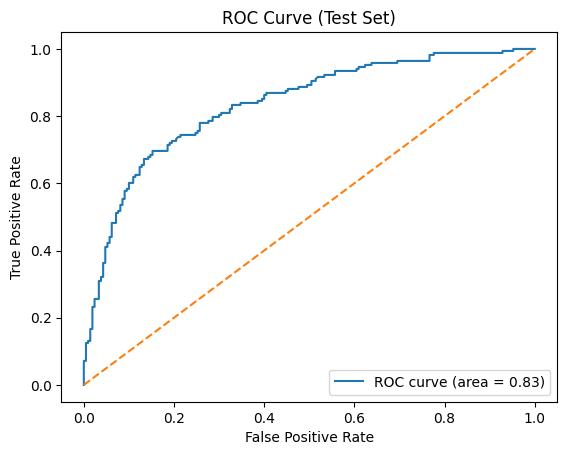

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define pipeline with Extra Trees Classifier
pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)

print("Extra Trees Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)


print("\nExtra Trees Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **Gradient Boosting Classifier cv**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()

# Define the classifier
gb_classifier = GradientBoostingClassifier()

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    gb_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = gb_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"======== Fold {fold} Metrics ========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 1 Metrics ========
Accuracy: 0.7592592592592593
Precision: 0.7581699346405228
Recall: 0.6823529411764706
F1 Score: 0.718266253869969
ROC-AUC Score: 0.846337669683258




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 2 Metrics ========
Accuracy: 0.7486772486772487
Precision: 0.660377358490566
Recall: 0.7191780821917808
F1 Score: 0.6885245901639343
ROC-AUC Score: 0.8307156353330185




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 3 Metrics ========
Accuracy: 0.7639257294429708
Precision: 0.8068965517241379
Recall: 0.6573033707865169
F1 Score: 0.7244582043343653
ROC-AUC Score: 0.8441928744847834




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 4 Metrics ========
Accuracy: 0.7824933687002652
Precision: 0.785234899328859
Recall: 0.7005988023952096
F1 Score: 0.740506329113924
ROC-AUC Score: 0.8428999144568007




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 5 Metrics ========
Accuracy: 0.7771883289124668
Precision: 0.7682119205298014
Recall: 0.703030303030303
F1 Score: 0.7341772151898734
ROC-AUC Score: 0.8488993710691825


Mean Accuracy: 0.7663087869984422
Mean Precision: 0.7557781329427774
Mean Recall: 0.6924926999160562
Mean F1 Score: 0.7211865185344132
Mean ROC-AUC Score: 0.8426090930054085


## **extra trees classifier with cross validation**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC


# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier=  ExtraTreesClassifier()
# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


<ipython-input-90-ecdd3301eded>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 1 Metrics========
Accuracy: 0.7936507936507936
Precision: 0.7948717948717948
Recall: 0.7294117647058823
F1 Score: 0.7607361963190183
ROC-AUC Score: 0.8773614253393665




<ipython-input-90-ecdd3301eded>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 2 Metrics========
Accuracy: 0.7671957671957672
Precision: 0.7013888888888888
Recall: 0.6917808219178082
F1 Score: 0.696551724137931
ROC-AUC Score: 0.8612423240434578




<ipython-input-90-ecdd3301eded>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 3 Metrics========
Accuracy: 0.7480106100795756
Precision: 0.7643312101910829
Recall: 0.6741573033707865
F1 Score: 0.7164179104477612
ROC-AUC Score: 0.8308254756930722




<ipython-input-90-ecdd3301eded>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 4 Metrics========
Accuracy: 0.8169761273209549
Precision: 0.855072463768116
Recall: 0.7065868263473054
F1 Score: 0.7737704918032787
ROC-AUC Score: 0.8910464784716281




<ipython-input-90-ecdd3301eded>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 5 Metrics========
Accuracy: 0.7957559681697612
Precision: 0.7857142857142857
Recall: 0.7333333333333333
F1 Score: 0.7586206896551724
ROC-AUC Score: 0.869711263579188


Mean Accuracy: 0.7843178532833706
Mean Precision: 0.7802757286868337
Mean Recall: 0.7070540099350231
Mean F1 Score: 0.7412194024726324
Mean ROC-AUC Score: 0.8660373934253425


## **Extra Trees Classifier (ETC)**

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Extra Trees Train Set Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


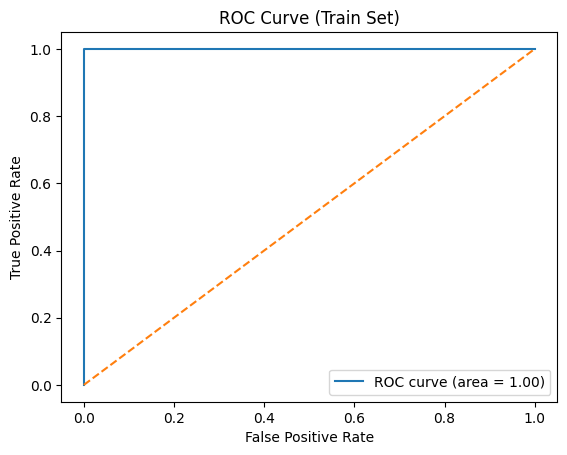


Extra Trees Test Set Metrics:
Precision: 0.7777777777777778
Recall: 0.68359375
F1 Score: 0.7276507276507277
ROC-AUC Score: 0.850940765675241


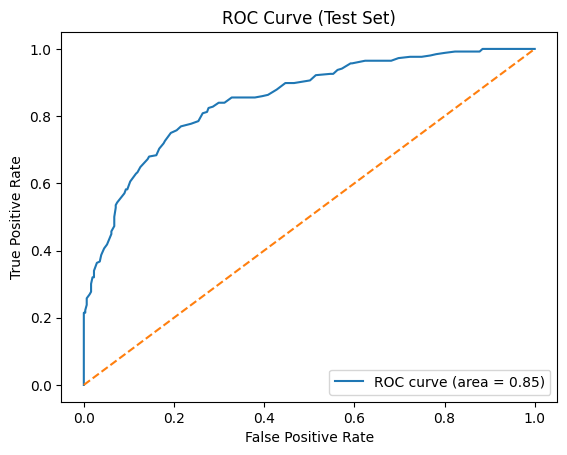

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define pipeline with Extra Trees Classifier
pipeline = Pipeline([
    ('classifier', ExtraTreesClassifier())
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

print("Extra Trees Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)

print("\nExtra Trees Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# using Rs simca package to use in **python**

In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython


In [ ]:
import rpy2.robjects.packages as rpackages

# Install mdatools package in R
utils = rpackages.importr('utils')
utils.install_packages('mdatools')

# Load mdatools library



(as ‘lib’ is unspecified)







	‘/tmp/Rtmp5Qk9JO/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f65e3fbbd00> [RTYPES.NILSXP]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri, pandas2ri, StrVector
import rpy2.robjects as ro

# Convert Python data to R objects
numpy2ri.activate()
pandas2ri.activate()
yc = pd.read_csv('merged_y.csv')
merged_data=pd.read_csv('merged_data.csv')
# Convert arrays to pandas DataFrame
X_df = pd.DataFrame(merged_data)
y_df = pd.DataFrame(yc)

# Load mdatools library
mdatools = importr("mdatools")

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Convert pandas DataFrames to R matrices
X_train_r = pandas2ri.DataFrame(X_train)
X_test_r = pandas2ri.DataFrame(X_test)
y_train_r = pandas2ri.DataFrame(y_train)
y_test_r = pandas2ri.DataFrame(y_test)


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_train_r shape: {ro.r('dim')(X_train_r)}")
print(f"y_train_r shape: {ro.r('dim')(y_train_r)}")



X_train shape: (1509, 79)
y_train shape: (1509, 1)
X_train_r shape: [1509   79]
y_train_r shape: [1509    1]


In [ ]:
# Convert class names to R string vector
class_names = StrVector(["non_HEA", "HEA"])  # Replace class1 and class2 with your actual class names
model = mdatools.simca(X_train_r, "HEA", ncomp=2, scale=False, center=True, cv=1, method="svd", alpha=0.05, gamma=0.01)

In [ ]:
summary(model)


NameError: name 'summary' is not defined

# **random forest classifier **

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy: 1.0
XGB Train Set Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


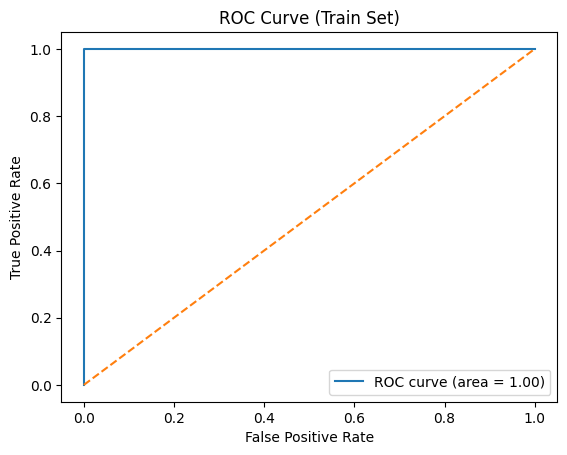

Accuracy: 0.781305114638448
XGB Test Set Metrics:
Precision: 0.7869565217391304
Recall: 0.70703125
F1 Score: 0.7448559670781892
ROC-AUC Score: 0.8521716740353699


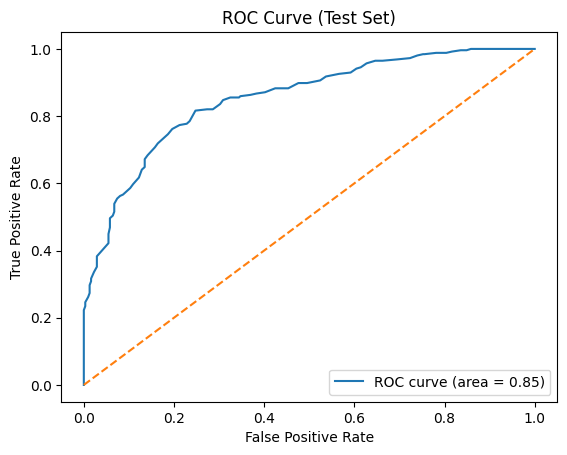

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([

    ('classifier', RandomForestClassifier())
])
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=0)
# Train and evaluate
pipeline.fit(X_train, y_train)
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
print("XGB Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)


print("XGB Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **kfold cross validation for randomforest**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier = RandomForestClassifier()

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


<ipython-input-34-bcc9b5545026>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 1 Metrics========
Accuracy: 0.7936507936507936
Precision: 0.7875
Recall: 0.7411764705882353
F1 Score: 0.7636363636363637
ROC-AUC Score: 0.8748303167420814




<ipython-input-34-bcc9b5545026>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 2 Metrics========
Accuracy: 0.7698412698412699
Precision: 0.7034482758620689
Recall: 0.6986301369863014
F1 Score: 0.7010309278350515
ROC-AUC Score: 0.8643274681152575




<ipython-input-34-bcc9b5545026>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 3 Metrics========
Accuracy: 0.753315649867374
Precision: 0.7741935483870968
Recall: 0.6741573033707865
F1 Score: 0.7207207207207207
ROC-AUC Score: 0.8441646434419287




<ipython-input-34-bcc9b5545026>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 4 Metrics========
Accuracy: 0.8063660477453581
Precision: 0.8309859154929577
Recall: 0.7065868263473054
F1 Score: 0.7637540453074434
ROC-AUC Score: 0.887125748502994




<ipython-input-34-bcc9b5545026>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


========Fold 5 Metrics========
Accuracy: 0.8090185676392573
Precision: 0.803921568627451
Recall: 0.7454545454545455
F1 Score: 0.7735849056603775
ROC-AUC Score: 0.880503144654088


Mean Accuracy: 0.7864384657488106
Mean Precision: 0.7800098616739148
Mean Recall: 0.7132010565494349
Mean F1 Score: 0.7445453926319914
Mean ROC-AUC Score: 0.87019026429127


# **KNclassifier**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8545454545454545
XGB Train Set Metrics:
Precision: 0.828125
Recall: 0.8368421052631579
F1 Score: 0.8324607329842932
ROC-AUC Score: 0.9258970760233918


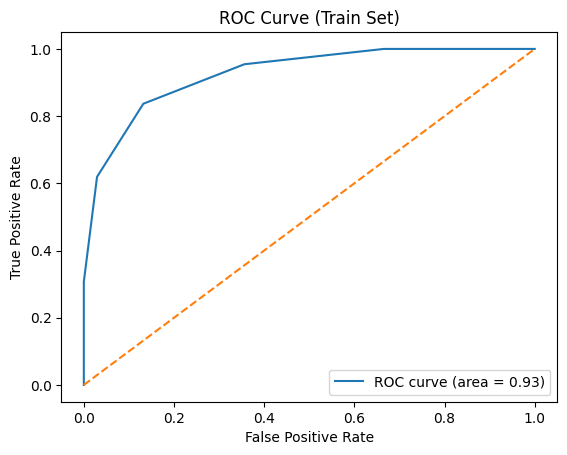

Accuracy: 0.7231040564373897
XGB Test Set Metrics:
Precision: 0.6972111553784861
Recall: 0.68359375
F1 Score: 0.6903353057199211
ROC-AUC Score: 0.7983445538585209


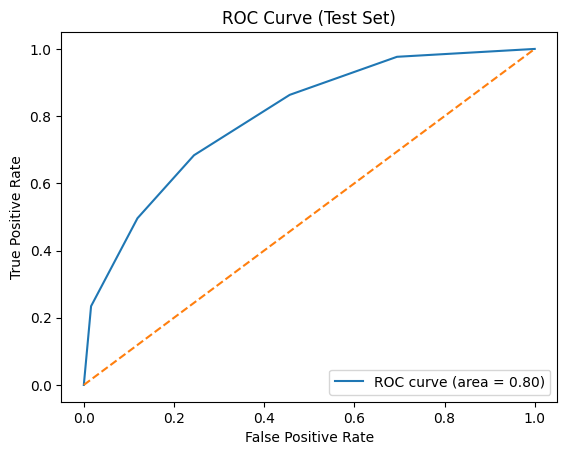

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Train and evaluate
pipeline.fit(X_train, y_train)
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
print("XGB Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)

print("XGB Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **kn classifier cross validation**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier = KNeighborsClassifier()

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


========Fold 1 Metrics========
Accuracy: 0.7698412698412699
Precision: 0.7455621301775148
Recall: 0.7411764705882353
F1 Score: 0.7433628318584071
ROC-AUC Score: 0.841091628959276


========Fold 2 Metrics========
Accuracy: 0.708994708994709
Precision: 0.6046511627906976
Recall: 0.7123287671232876
F1 Score: 0.6540880503144654
ROC-AUC Score: 0.7687322862541331


========Fold 3 Metrics========
Accuracy: 0.726790450928382
Precision: 0.7218934911242604
Recall: 0.6853932584269663
F1 Score: 0.7031700288184438
ROC-AUC Score: 0.7768900683191237


========Fold 4 Metrics========
Accuracy: 0.7639257294429708
Precision: 0.7294117647058823
Recall: 0.7425149700598802
F1 Score: 0.7359050445103856
ROC-AUC Score: 0.8264471057884231


========Fold 5 Metrics========
Accuracy: 0.6923076923076923
Precision: 0.6449704142011834
Recall: 0.6606060606060606
F1 Score: 0.6526946107784432
ROC-AUC Score: 0.7704116638078903


Mean Accuracy: 0.7323719703030047
Mean Precision: 0.6892977925999078
Mean Recall: 0.708403905

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

# **XGB boost** **bold text**

Accuracy: 0.9454545454545454
XGB Train Set Metrics:
Precision: 0.9494584837545126
Recall: 0.9228070175438596
F1 Score: 0.9359430604982206
ROC-AUC Score: 0.989246783625731


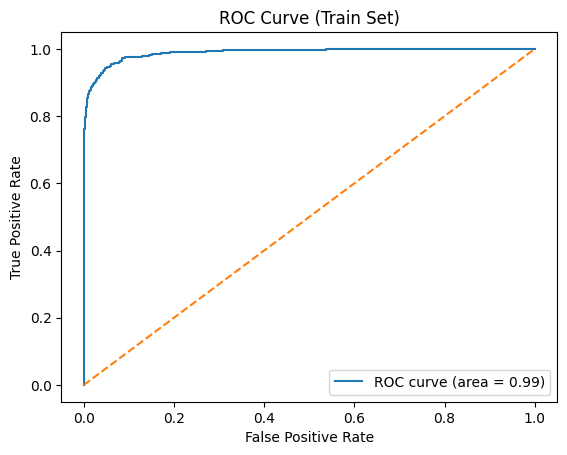

Accuracy: 0.7760141093474426
XGB Test Set Metrics:
Precision: 0.7698744769874477
Recall: 0.71875
F1 Score: 0.7434343434343434
ROC-AUC Score: 0.860480305466238


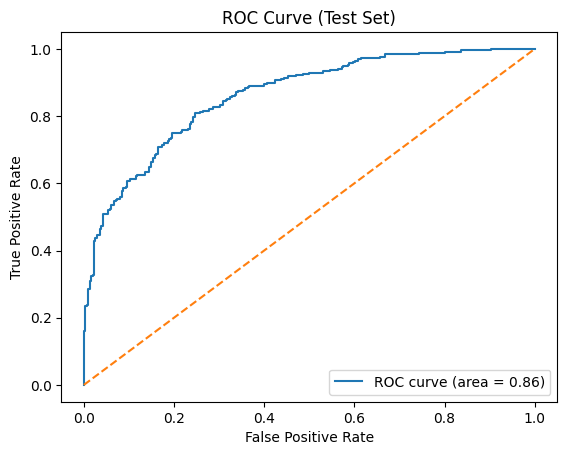

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=0)
from xgboost import XGBClassifier

# XGBoost Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
print("XGB Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)

print("XGB Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **xgb with cross validation**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier


# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


========Fold 1 Metrics========
Accuracy: 0.7857142857142857
Precision: 0.7542857142857143
Recall: 0.7764705882352941
F1 Score: 0.7652173913043478
ROC-AUC Score: 0.8682975113122172


========Fold 2 Metrics========
Accuracy: 0.7777777777777778
Precision: 0.7183098591549296
Recall: 0.6986301369863014
F1 Score: 0.7083333333333335
ROC-AUC Score: 0.8600614076523381


========Fold 3 Metrics========
Accuracy: 0.7639257294429708
Precision: 0.779874213836478
Recall: 0.6966292134831461
F1 Score: 0.7359050445103857
ROC-AUC Score: 0.8585907063406921


========Fold 4 Metrics========
Accuracy: 0.8275862068965517
Precision: 0.8311688311688312
Recall: 0.7664670658682635
F1 Score: 0.7975077881619937
ROC-AUC Score: 0.8913601368691189


========Fold 5 Metrics========
Accuracy: 0.7984084880636605
Precision: 0.7947019867549668
Recall: 0.7272727272727273
F1 Score: 0.759493670886076
ROC-AUC Score: 0.8780731846769582


Mean Accuracy: 0.7906824975790492
Mean Precision: 0.7756681210401841
Mean Recall: 0.73309394

# **GNB with mean centering**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Centered GNB Train Set Metrics:
Precision: 0.44670846394984326
Recall: 1.0
F1 Score: 0.6175514626218851
ROC-AUC Score: 0.5291754385964913


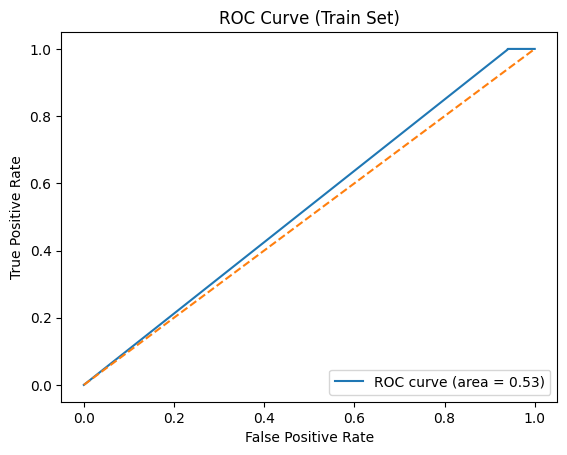

Mean Centered GNB Test Set Metrics:
Precision: 0.46715328467153283
Recall: 1.0
F1 Score: 0.6368159203980099
ROC-AUC Score: 0.5305466237942122


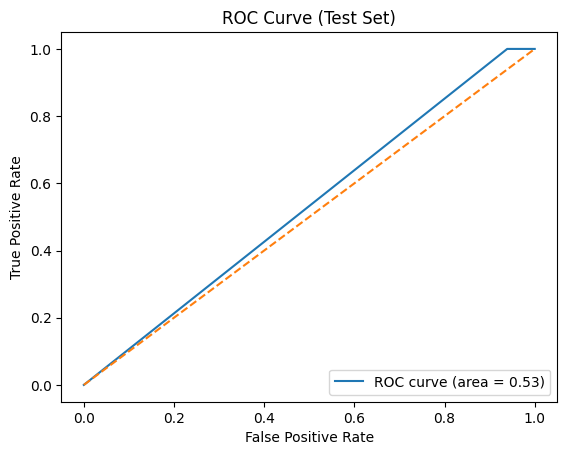

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=0)
# Mean centering (without scaling)
X_train_mean_centered = X_train - np.mean(X_train, axis=0)
X_test_mean_centered = X_test - np.mean(X_train, axis=0)

# Use Gaussian Naive Bayes Classifier
pipeline =  GaussianNB()


# Train and evaluate
pipeline.fit(X_train_mean_centered, y_train)
predicted_labels_train = pipeline.predict(X_train_mean_centered)
predicted_probabilities_train = pipeline.predict_proba(X_train_mean_centered)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

print("Mean Centered GNB Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test_mean_centered)
predicted_probabilities_test = pipeline.predict_proba(X_test_mean_centered)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)

print("Mean Centered GNB Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# gaussaian **nb**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GNB Train Set Metrics:
Precision: 0.4513031550068587
Recall: 1.0
F1 Score: 0.6219281663516067
ROC-AUC Score: 0.5299647473560517
Accuracy: 0.46984758117958914


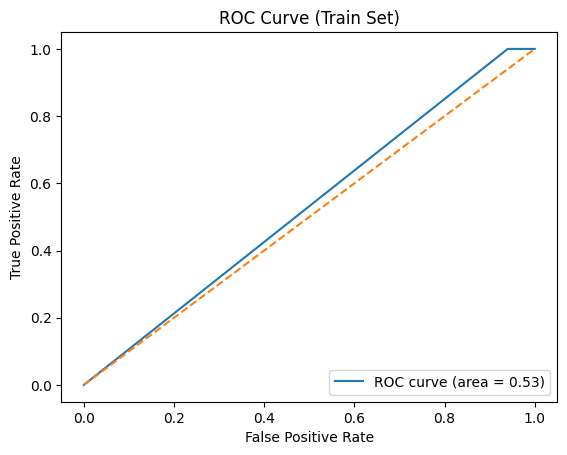

Accuracy: 0.47619047619047616
GNB Test Set Metrics:
Precision: 0.45901639344262296
Recall: 1.0
F1 Score: 0.6292134831460674
ROC-AUC Score: 0.5285714285714286


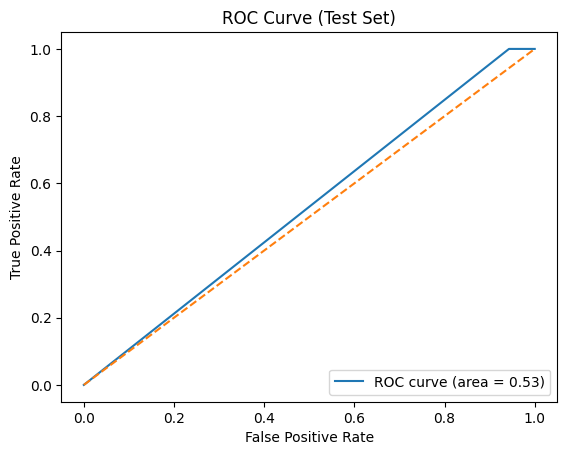

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)
# Gaussian Naive Bayes Classifier
pipeline = GaussianNB()
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Train and evaluate
pipeline.fit(X_train, y_train)
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

print("GNB Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
# ROC Curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Predictions and metrics for test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)
print("GNB Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# ROC Curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **hypertunnnning of gnbc**

In [ ]:
pip install hypopt


ERROR: Operation cancelled by user


In [ ]:
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score ,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline




Test Score: 0.4339


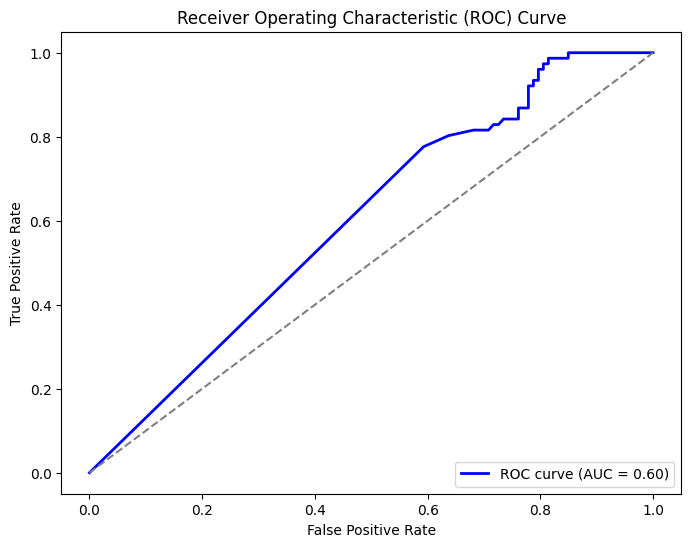

ROC AUC Score: 0.601187703772706
F1 Score: 0.5868725868725869
Accuracy: 0.43386243386243384
Precision: 0.41530054644808745
Recall: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(merged_data , yc, test_size=0.2, random_state=0)

import numpy as np
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
y_train_temp = y_train_temp.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Define hyperparameter grid
param_grid = {
    'priors': [None, [0.1, 0.9], [0.5, 0.5]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize GridSearchCV with the Gaussian Naive Bayes model and hyperparameter grid
gs = GridSearchCV(estimator=gnb, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit GridSearchCV to training data
gs.fit(X_train_temp, y_train_temp)

# Get the best model from GridSearchCV
best_model = gs.best_estimator_
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
test_score = best_model.score(X_test, y_test)
print('Test Score:', round(test_score, 4))
# Calculate metrics
roc_auc = roc_auc_score(y_test, y_probs)
f1 = f1_score(y_test, best_model.predict(X_test))
accuracy = accuracy_score(y_test, best_model.predict(X_test))
precision = precision_score(y_test, best_model.predict(X_test))
recall = recall_score(y_test, best_model.predict(X_test))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
# Evaluate the best model on the test set



# **svc hyper tunning**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.183 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.144 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.212 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.212 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.198 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.061 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.008 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.015 total time=   1.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.015 total time=   1.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.008 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

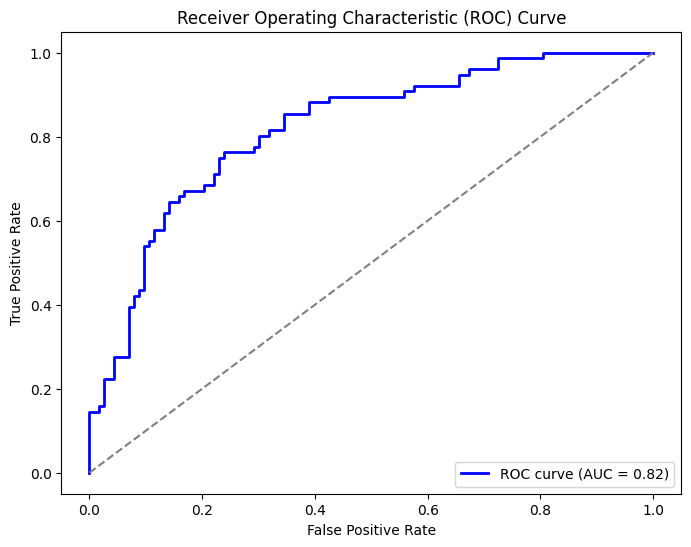

In [7]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
merged_data = pd.read_csv('merged_data.csv')
yc = pd.read_csv('merged_y.csv')
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(merged_data, yc, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_val = y_val.values.ravel()
# Initialize SVC classifier
svc_classifier = SVC(probability=True)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf' , 'linear']
}

# Initialize GridSearchCV
gs = GridSearchCV(estimator=svc_classifier, param_grid=param_grid ,scoring= 'recall', refit=True  ,verbose =3 , cv=5)

# Fit GridSearchCV to training data
gs.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_svc_model = gs.best_estimator_

# Evaluate the best model on the test set
y_probs = best_svc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
f1 = f1_score(y_test, best_svc_model.predict(X_test))
accuracy = accuracy_score(y_test, best_svc_model.predict(X_test))
precision = precision_score(y_test, best_svc_model.predict(X_test))
recall = recall_score(y_test, best_svc_model.predict(X_test))

# Print best parameters obtained from hyperparameter tuning
print("Best Parameters:", gs.best_params_)

# Print evaluation metrics
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **gnb with cross validation**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB


# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier = GaussianNB()

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


========Fold 1 Metrics========
Accuracy: 0.48412698412698413
Precision: 0.4657534246575342
Recall: 1.0
F1 Score: 0.6355140186915887
ROC-AUC Score: 0.53125


========Fold 2 Metrics========
Accuracy: 0.43386243386243384
Precision: 0.40555555555555556
Recall: 1.0
F1 Score: 0.5770750988142292
ROC-AUC Score: 0.5367560226735947


========Fold 3 Metrics========
Accuracy: 0.4986737400530504
Precision: 0.48501362397820164
Recall: 1.0
F1 Score: 0.6532110091743119
ROC-AUC Score: 0.5251256281407035


========Fold 4 Metrics========
Accuracy: 0.46684350132625996
Precision: 0.453804347826087
Recall: 1.0
F1 Score: 0.6242990654205608
ROC-AUC Score: 0.5238095238095238


========Fold 5 Metrics========
Accuracy: 0.47214854111405835
Precision: 0.4532967032967033
Recall: 1.0
F1 Score: 0.6238185255198488
ROC-AUC Score: 0.5306603773584906


Mean Accuracy: 0.47113104009655726
Mean Precision: 0.4526847310628163
Mean Recall: 1.0
Mean F1 Score: 0.6227835435241078
Mean ROC-AUC Score: 0.5295203103964624


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# **nu svc**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9045454545454545
Nu-SVC Train Set Metrics:
Precision: 0.9165120593692022
Recall: 0.8591304347826086
F1 Score: 0.8868940754039496
ROC-AUC Score: 0.9684412022176832


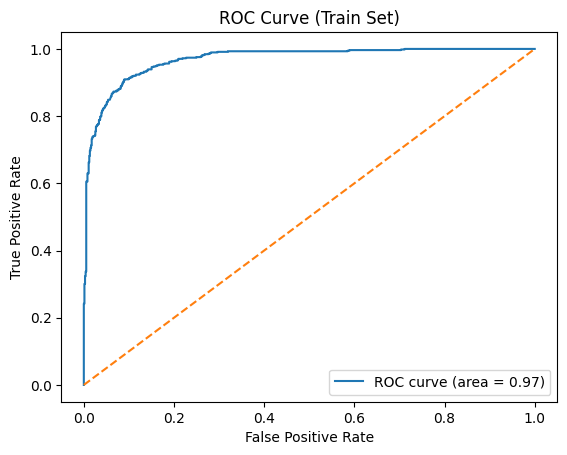

Accuracy: 0.7848324514991182
Nu-SVC Test Set Metrics:
Precision: 0.7792207792207793
Recall: 0.7171314741035857
F1 Score: 0.7468879668049793
ROC-AUC Score: 0.8746532855918099


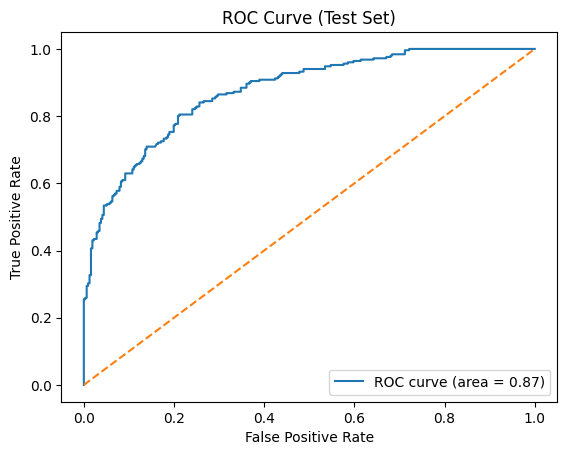

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.3, random_state=42)

# Nu-SVC
pipeline = NuSVC(probability=True)

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]  # For ROC curve

# Calculate metrics for the training set
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)

print("Accuracy:", accuracy_fold)
print("Nu-SVC Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# Plot ROC Curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]  # For ROC curve

# Calculate metrics for the test set
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)
print("Nu-SVC Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# Plot ROC Curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


# **nu svc with cross validation **

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import NuSVC


# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier= NuSVC(probability=True)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 1 Metrics========
Accuracy: 0.7962962962962963
Precision: 0.7852760736196319
Recall: 0.7529411764705882
F1 Score: 0.7687687687687688
ROC-AUC Score: 0.8818297511312218




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 2 Metrics========
Accuracy: 0.7486772486772487
Precision: 0.6624203821656051
Recall: 0.7123287671232876
F1 Score: 0.6864686468646863
ROC-AUC Score: 0.8370925838450638




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 3 Metrics========
Accuracy: 0.7692307692307693
Precision: 0.7973856209150327
Recall: 0.6853932584269663
F1 Score: 0.7371601208459215
ROC-AUC Score: 0.8518434870984134




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 4 Metrics========
Accuracy: 0.7931034482758621
Precision: 0.7986577181208053
Recall: 0.7125748502994012
F1 Score: 0.7531645569620252
ROC-AUC Score: 0.8808953521528372




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 5 Metrics========
Accuracy: 0.7824933687002652
Precision: 0.7748344370860927
Recall: 0.7090909090909091
F1 Score: 0.740506329113924
ROC-AUC Score: 0.8682675814751286


Mean Accuracy: 0.7779602262360883
Mean Precision: 0.7637148463814336
Mean Recall: 0.7144657922822304
Mean F1 Score: 0.7372136845110652
Mean ROC-AUC Score: 0.863985751140533


# **svn with standard scaler**

Train Set Metrics:
Precision: 0.8807106598984772
Recall: 0.8829516539440203
F1 Score: 0.8818297331639136
ROC-AUC Score: 0.9383842551781482


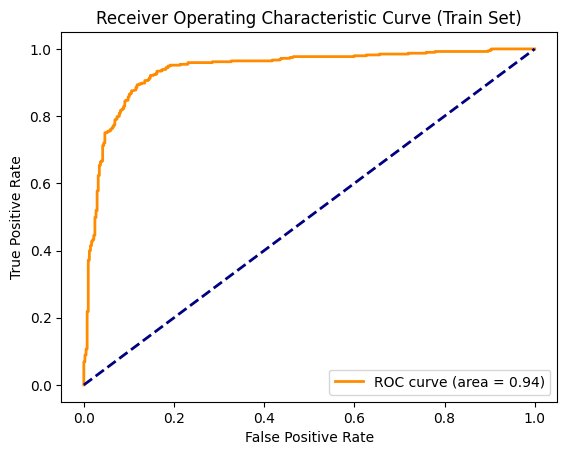

Test Set Metrics:
Precision: 0.9175257731958762
Recall: 0.8317757009345794
F1 Score: 0.872549019607843
ROC-AUC Score: 0.9231735503969449


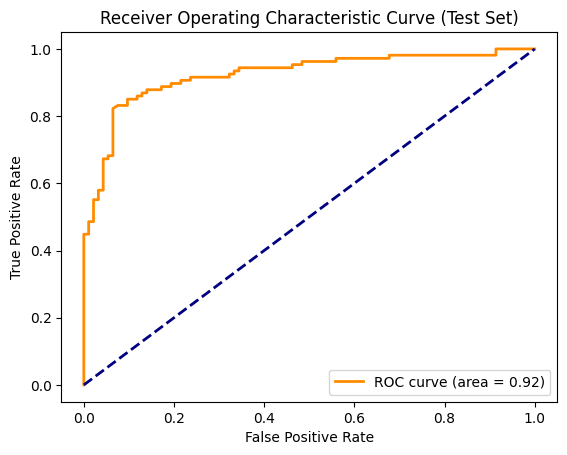

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Generate some synthetic binary classification data for illustration
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('svc', SVC(kernel='linear', probability=True))  # Use Support Vector Classifier with probability estimates
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training set
predicted_labels_train = pipeline.predict(X_train)
predicted_probabilities_train = pipeline.predict_proba(X_train)[:, 1]  # For ROC curve, get the probabilities of the positive class

# Calculate metrics for the training set
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)

print("Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)

# Plot ROC Curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()

# Make predictions on the test set
predicted_labels_test = pipeline.predict(X_test)
predicted_probabilities_test = pipeline.predict_proba(X_test)[:, 1]  # For ROC curve, get the probabilities of the positive class

# Calculate metrics for the test set
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)

print("Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# Plot ROC Curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming model is your trained machine learning model
# X and y are your feature and target matrices, respectively

# Define the number of folds (k)
k = 5  # Adjust as needed

# Perform k-fold cross-validation
cv_scores = cross_val_score(pipeline, merged_data, yc, cv=k, scoring='accuracy')  # Use appropriate scoring metric

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-Validation Scores: [0.72222222 0.67460317 0.70291777 0.71352785 0.68169761]
Mean Cross-Validation Score: 0.6989937265799335
Standard Deviation of Cross-Validation Scores: 0.018222274870673783


# **svn classifier**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', probability=True)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True)

In [ ]:
predicted_labels_train = model.predict(X_train)
predicted_labels_train


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
predicted_probabilities_train = model.predict_proba(X_train)[:, 1]
predicted_probabilities_train

array([0.47288967, 0.264009  , 0.3090114 , ..., 0.5529604 , 0.45261064,
       0.15733991])

Accuracy: 0.7019867549668874
Train Set Metrics:
Precision: 0.692167577413479
Recall: 0.5748865355521936
F1 Score: 0.6280991735537189
ROC-AUC Score: 0.7553961321408653


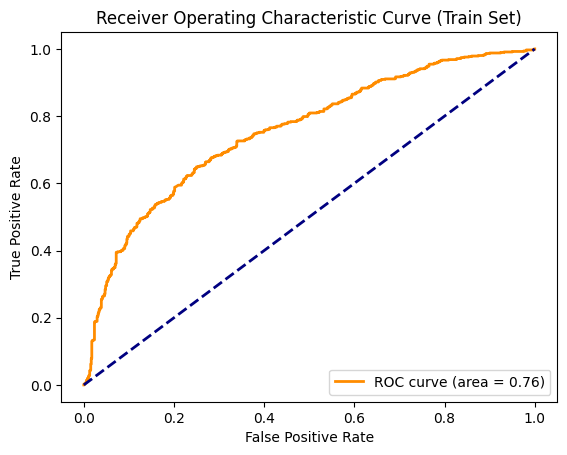

In [ ]:


# Calculate metrics for the training set
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
roc_auc_train = roc_auc_score(y_train, predicted_probabilities_train)
accuracy_fold = accuracy_score(y_train, predicted_labels_train)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)
print("Train Set Metrics:")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)
# Plot ROC Curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, predicted_probabilities_train)
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Train Set)')
plt.legend(loc="lower right")
plt.show()


In [ ]:

predicted_labels_test = model.predict(X_test)
predicted_probabilities_test = model.predict_proba(X_test)[:, 1]  # For ROC curve, get the probabilities of the positive class


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy: 0.6825396825396826
Test Set Metrics:
Precision: 0.6081081081081081
Recall: 0.5921052631578947
F1 Score: 0.6
ROC-AUC Score: 0.6977759664648346


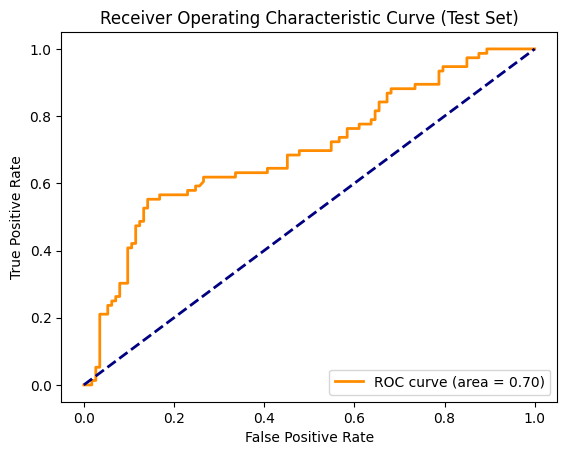

In [ ]:


# Calculate metrics for the test set
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
roc_auc_test = roc_auc_score(y_test, predicted_probabilities_test)
accuracy_fold = accuracy_score(y_test, predicted_labels_test)
accuracy_scores.append(accuracy_fold)
print("Accuracy:", accuracy_fold)

print("Test Set Metrics:")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("ROC-AUC Score:", roc_auc_test)

# Plot ROC Curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, predicted_probabilities_test)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

# **svn with cross validation **

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC


# Convert DataFrame to NumPy array
merged_data_array = merged_data.to_numpy()
yc_array = yc.to_numpy()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_classifier=  SVC(kernel='linear', probability=True)

# Define the number of splits for K-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
roc_auc_scores = []


# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data_array), 1):
    X_train, X_test = merged_data_array[train_index], merged_data_array[test_index]
    y_train, y_test = yc_array[train_index], yc_array[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for the test set
    predicted_probabilities_test = rf_classifier.predict_proba(X_test)[:, 1]
    predicted_labels_test = (predicted_probabilities_test > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test, predicted_labels_test)
    precision_fold = precision_score(y_test, predicted_labels_test)
    recall_fold = recall_score(y_test, predicted_labels_test)
    f1_fold = f1_score(y_test, predicted_labels_test)
    roc_auc_fold = roc_auc_score(y_test, predicted_probabilities_test)

    # Append evaluation metrics to respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    roc_auc_scores.append(roc_auc_fold)

    # Print evaluation metrics for this fold
    print(f"========Fold {fold} Metrics========")
    print("Accuracy:", accuracy_fold)
    print("Precision:", precision_fold)
    print("Recall:", recall_fold)
    print("F1 Score:", f1_fold)
    print("ROC-AUC Score:", roc_auc_fold)
    print("\n")

# Print mean evaluation metrics across all folds
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean ROC-AUC Score:", np.mean(roc_auc_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 1 Metrics========
Accuracy: 0.716931216931217
Precision: 0.7142857142857143
Recall: 0.6176470588235294
F1 Score: 0.6624605678233438
ROC-AUC Score: 0.7574236425339367




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 2 Metrics========
Accuracy: 0.701058201058201
Precision: 0.6122448979591837
Recall: 0.6164383561643836
F1 Score: 0.6143344709897611
ROC-AUC Score: 0.7412021728861595




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 3 Metrics========
Accuracy: 0.6816976127320955
Precision: 0.7338709677419355
Recall: 0.5112359550561798
F1 Score: 0.6026490066225166
ROC-AUC Score: 0.7264694257805884




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 4 Metrics========
Accuracy: 0.6923076923076923
Precision: 0.6917293233082706
Recall: 0.5508982035928144
F1 Score: 0.6133333333333333
ROC-AUC Score: 0.7366410037068719




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


========Fold 5 Metrics========
Accuracy: 0.6923076923076923
Precision: 0.6689655172413793
Recall: 0.5878787878787879
F1 Score: 0.6258064516129032
ROC-AUC Score: 0.7367638650657519


Mean Accuracy: 0.6968604830673797
Mean Precision: 0.6842192841072967
Mean Recall: 0.576819672303139
Mean F1 Score: 0.6237167660763717
Mean ROC-AUC Score: 0.7397000219946617
